In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/df.csv
/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/images/653_00120.png
/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/images/229_00180.png
/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/images/298_00330.png
/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/images/7_00240.png
/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/images/456_00180.png
/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok

In [2]:
# !wget --quiet https://github.com/sizhky/torch_snippets.git
!pip install torch_snippets
from torch_snippets import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 1.2 MB/s eta 0:00:00ta 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 kB 4.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 28.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 45.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 36.1 MB/s eta 0:00:0000:01:00:01
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=59b5662fcbd668644b0e20064a0d1fa487fadef911a4cb259f32c2ff99b16ec8
  Stored in directory: /root/.cache/pip/wheels/7c/d0/9e/1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
Successfully built t

In [3]:
# from torch_snippets import *
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchinfo import summary
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T, models, datasets
from xml.etree import ElementTree as et
import torchvision
import glob
import cv2
import pandas as pd
import numpy as np
import matplotlib.patches as patches
import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# **0. Создаем 2 списка: путей каритнок и путей аннотаций**

In [4]:
# /kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/images/0_00030.png
# /kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/masks/0_00030.png

In [5]:
# mask_files = glob.glob('../input/lgg-mri-segmentation/kaggle_3m/*/*_mask*')
im = Glob('/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/images/*')
ma = Glob('/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/masks/*')

image = [str(i) for i in im]#.sort()
mask = [str(i) for i in ma]#.sort()

image.sort()
mask.sort()

print(image[:1])
print(mask[:1])
print(len(image))
print(len(mask))

['/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/images/0_00030.png']
['/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/masks/0_00030.png']
2615
2615


In [6]:
image[:5]

['/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/images/0_00030.png',
 '/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/images/0_00180.png',
 '/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/images/0_00330.png',
 '/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/images/0_00360.png',
 '/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/images/0_00420.png']

In [7]:
mask[:5]

['/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/masks/0_00030.png',
 '/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/masks/0_00180.png',
 '/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/masks/0_00330.png',
 '/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/masks/0_00360.png',
 '/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/masks/0_00420.png']

# **1. Смотрим картинки**

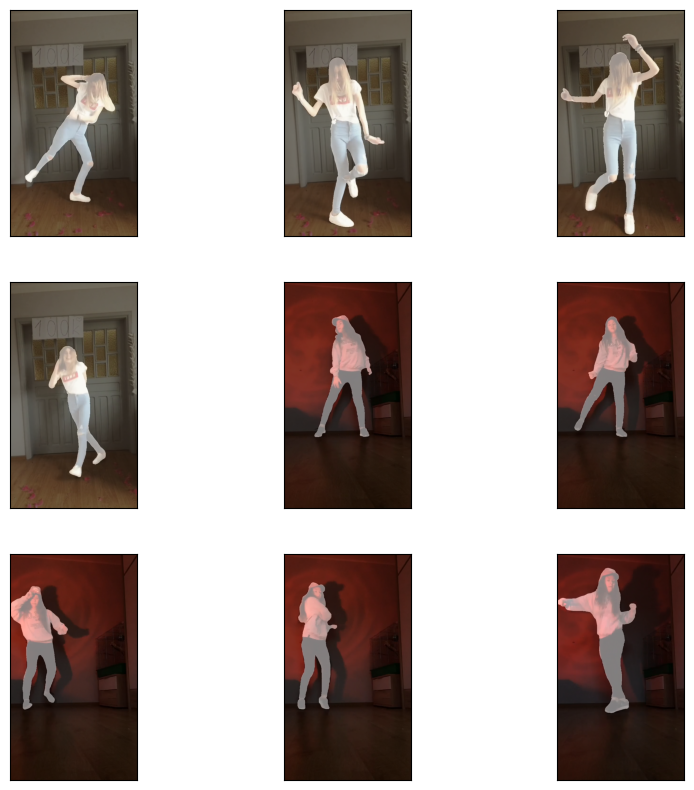

In [8]:
#Lets plot some samples
rows,cols=3,3
fig=plt.figure(figsize=(10,10))
for i in range(1,rows*cols+1):
    fig.add_subplot(rows,cols,i)
    img_path=image[i]
    msk_path=mask[i]
    img=cv2.imread(img_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    msk=cv2.imread(msk_path)
    plt.imshow(img)
    plt.imshow(msk,alpha=0.5)
    plt.xticks([]), plt.yticks([])
plt.show()

# **3. Смотрим аннотации (изображения)**

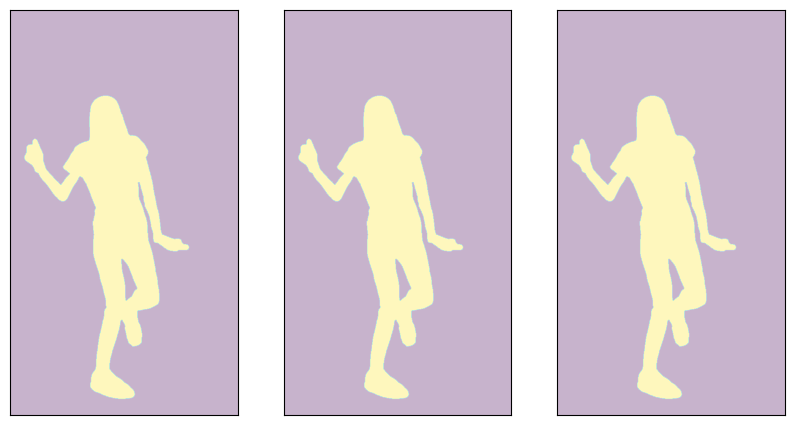

In [9]:
rows,cols=1,3
fig=plt.figure(figsize=(10,10))
for i in np.arange(1,4):
    fig.add_subplot(rows,cols,i)
    msk_path=mask[2]
    msk=cv2.imread(msk_path)
    plt.imshow(msk.transpose(-1,0,1)[i-1],alpha=0.3)
    plt.xticks([]), plt.yticks([])
plt.show()

# **4. Смотрим содержимое каналов маски**

In [10]:
# читаем картинку маски, 4меняем каналы местасми на (3,250,250),
an = cv2.imread(mask[2], 1).transpose(2,0,1)#/255
r,g,b = an

lst = []
for _ in [0,1,2]:
    k = r,g,b
    h = 'rgb'
    for i in k[_]:
        for j in i:
            if j not in lst: lst.append(j)
    print(f'Значения в канале {h[_]}: {lst}')

Значения в канале r: [0, 255]
Значения в канале g: [0, 255]
Значения в канале b: [0, 255]


# **5. Удаляем пустые маски и соотвествующие картинки, на выходе 2 сортированных списка**

In [11]:
len(mask)

2615

In [12]:
# функция сортировки:
def sort(elem):
    return elem.split('/')[-1]

In [13]:
annots = []
for ann in Tqdm(mask):
    _ann = cv2.imread(ann, 1).transpose(2,0,1)#/255
    _ann[_ann > 0 ] = 1 # переводит все значения >0 в единицу 1
    r,g,b = _ann
    if 1 not in np.unique(r): continue # отсеиваем маски в которых нет аномалии
    annots.append(ann)
print(f'Количество элементов: {len(annots)}')
print(f'Количество уникальных элементов: {len(set(annots))}')

# image.sort(key=sort)
# annots.sort(key=sort)

100%|██████████| 2615/2615 [00:45<00:00, 57.73it/s]

Количество элементов: 2615
Количество уникальных элементов: 2615


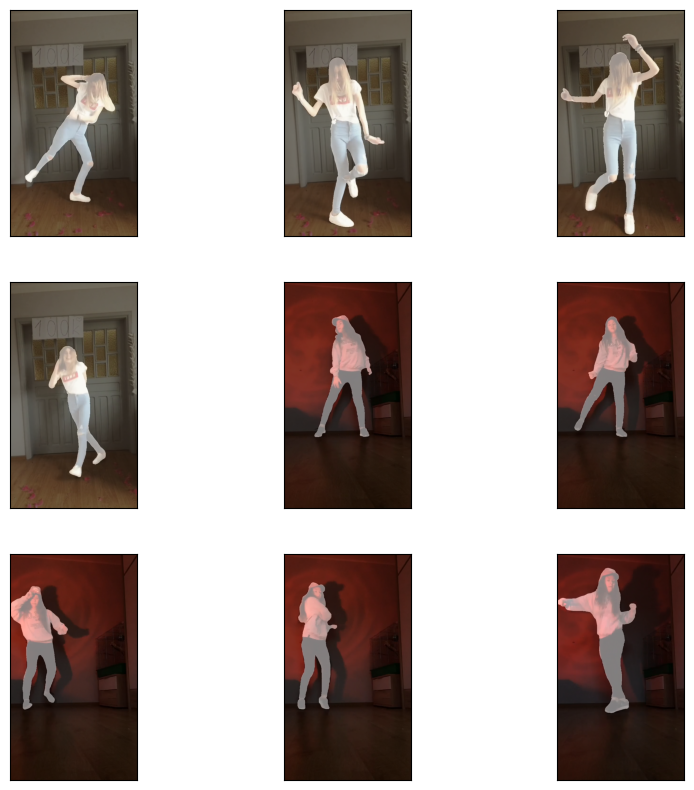

In [14]:
#Lets plot some samples
rows,cols=3,3
fig=plt.figure(figsize=(10,10))
for i in range(1,rows*cols+1):
    fig.add_subplot(rows,cols,i)
    img_path=image[i]
    msk_path=annots[i]
    img=cv2.imread(img_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    msk=cv2.imread(msk_path)
    plt.imshow(img)
    plt.imshow(msk,alpha=0.5)
    plt.xticks([]), plt.yticks([])
plt.show()

**как видим - отсутствуют пустые маски!!!**

# **6. Создаем dataframe**

In [15]:
name_col = ['pictures', 'annotations']
lst = image, annots
df = pd.DataFrame(np.column_stack(lst), columns = name_col)
print(df.iloc[0,0])
print(df.iloc[0,1])

/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/images/0_00030.png
/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/masks/0_00030.png


In [16]:
df.shape

(2615, 2)

In [17]:
# попарно выводим первый и второй столбец df
for _ in np.arange(4):
    print(df.iloc[_,0])
    print(df.iloc[_,1])

/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/images/0_00030.png
/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/masks/0_00030.png
/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/images/0_00180.png
/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/masks/0_00180.png
/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/images/0_00330.png
/kaggle/input/segmentation-full-body-tiktok-dancing-dataset/segmentation_full_body_tik_tok_2615_img/segmentation_full_body_tik_tok_2615_img/masks/0_00330.png
/kaggle/input/segmentation-full-body-tiktok-danci

In [18]:
df.head(5)

,pictures,annotations
0,/kaggle/input/segmentation-full-body-tiktok-da...,/kaggle/input/segmentation-full-body-tiktok-da...
1,/kaggle/input/segmentation-full-body-tiktok-da...,/kaggle/input/segmentation-full-body-tiktok-da...
2,/kaggle/input/segmentation-full-body-tiktok-da...,/kaggle/input/segmentation-full-body-tiktok-da...
3,/kaggle/input/segmentation-full-body-tiktok-da...,/kaggle/input/segmentation-full-body-tiktok-da...
4,/kaggle/input/segmentation-full-body-tiktok-da...,/kaggle/input/segmentation-full-body-tiktok-da...


# **7. train_test_split**

In [19]:
# Разбивка данных на основе столбца с именами картинок в df
from sklearn.model_selection import train_test_split
# trn_ids, val_ids = train_test_split(df.pictures.nunique(), test_size=0.1, random_state=99)
trn_ids, val_ids = train_test_split(df.pictures, test_size=0.2, random_state=99)
# trn_ids = list(trn_ids)
# val_ids = list(val_ids)
# типа разбивка df на train_df и val_df на основе разбивки train_test_split
trn_df, val_df = df[df['pictures'].isin(trn_ids)], df[df['pictures'].isin(val_ids)]
#print(trn_df, val_df)
print(f'для тренировки: {len(trn_df)}'), 
print(f'для проверки: {len(val_df)}')

для тренировки: 2092
для проверки: 523


# **8. Трансформации**

In [20]:
tfms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # imagenet
])

# **9. Создаем DataLoader**

In [21]:
class SegData(Dataset):
    def __init__(self, df):
        self.pictures = df.pictures.tolist()
        self.annotations = df.annotations.tolist()
    def __len__(self):
        return len(self.pictures)
    def __getitem__(self, ix):
        image = read(self.pictures[ix],1)#[..., ::-1]
        image = cv2.resize(image, (224,224))
        mask = read(self.annotations[ix])
        mask[mask > 0] = 1
        mask = cv2.resize(mask, (224,224))
        return image, mask.transpose(-1,0,1)
    def choose(self): return self[randint(len(self))]
    def collate_fn(self, batch):
        ims, masks = list(zip(*batch))
        ims = torch.cat([tfms(im.copy()/255.)[None] for im in ims]).float().to(device)
        ce_masks = torch.cat([torch.Tensor(mask[0][None]) for mask in masks]).long().to(device)
        return ims, ce_masks

In [22]:
trn_ds = SegData(trn_df)
val_ds = SegData(val_df)
trn_dl = DataLoader(trn_ds, batch_size=4, shuffle=True, collate_fn=trn_ds.collate_fn)
val_dl = DataLoader(val_ds, batch_size=1, shuffle=True, collate_fn=val_ds.collate_fn)

In [23]:
for i in trn_ds:
    print(i[0].shape)
    print(i[1].shape)
    break

(224, 224, 3)
(3, 224, 224)


In [24]:
for i in trn_dl:
    print(i[0].shape)
    print(i[1].shape)
    break

torch.Size([4, 3, 224, 224])
torch.Size([4, 224, 224])


# **10. Смотрим картинку, маску и картинку с наложенной маской (в одну строку)**

In [25]:
x = iter(trn_ds)

(224, 224, 3)
(3, 224, 224)


<function matplotlib.pyplot.show(close=None, block=None)>

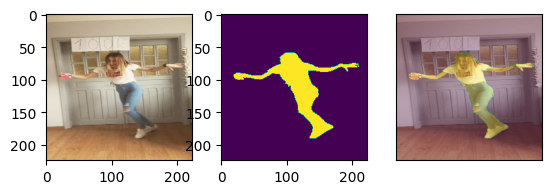

In [26]:
# входные данные должны быть размера (224, 224, 3) и (3, 224, 224)
im,m = next(x)
print(im.shape)
print(m.shape)
fig, ax = plt.subplots(1,3)
ax[0].imshow(im)
ax[1].imshow(m[2])
ax[2].imshow(im)
ax[2].imshow(m[2],alpha=0.3)
plt.xticks([]), plt.yticks([])
plt.show

In [27]:
def conv(in_channels, out_channels):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True)
    )

In [28]:
def up_conv(in_channels, out_channels):
    return nn.Sequential(
        nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
        nn.ReLU(inplace=True)
    )

In [29]:
from torchvision.models import vgg16_bn
class UNet(nn.Module):
    def __init__(self, weights=True, out_channels=12):
        super().__init__()

        self.encoder = vgg16_bn(weights=weights).features
        self.block1 = nn.Sequential(*self.encoder[:6])
        self.block2 = nn.Sequential(*self.encoder[6:13])
        self.block3 = nn.Sequential(*self.encoder[13:20])
        self.block4 = nn.Sequential(*self.encoder[20:27])
        self.block5 = nn.Sequential(*self.encoder[27:34])

        self.bottleneck = nn.Sequential(*self.encoder[34:])
        self.conv_bottleneck = conv(512, 1024)

        self.up_conv6 = up_conv(1024, 512)
        self.conv6 = conv(512 + 512, 512)
        self.up_conv7 = up_conv(512, 256)
        self.conv7 = conv(256 + 512, 256)
        self.up_conv8 = up_conv(256, 128)
        self.conv8 = conv(128 + 256, 128)
        self.up_conv9 = up_conv(128, 64)
        self.conv9 = conv(64 + 128, 64)
        self.up_conv10 = up_conv(64, 32)
        self.conv10 = conv(32 + 64, 32)
        self.conv11 = nn.Conv2d(32, out_channels, kernel_size=1)
    def forward(self, x):
        block1 = self.block1(x)
        block2 = self.block2(block1)
        block3 = self.block3(block2)
        block4 = self.block4(block3)
        block5 = self.block5(block4)

        bottleneck = self.bottleneck(block5)
        x = self.conv_bottleneck(bottleneck)

        x = self.up_conv6(x)
        x = torch.cat([x, block5], dim=1)
        x = self.conv6(x)

        x = self.up_conv7(x)
        x = torch.cat([x, block4], dim=1)
        x = self.conv7(x)

        x = self.up_conv8(x)
        x = torch.cat([x, block3], dim=1)
        x = self.conv8(x)

        x = self.up_conv9(x)
        x = torch.cat([x, block2], dim=1)
        x = self.conv9(x)

        x = self.up_conv10(x)
        x = torch.cat([x, block1], dim=1)
        x = self.conv10(x)

        x = self.conv11(x)

        return x

In [30]:
ce = nn.CrossEntropyLoss()
def UnetLoss(preds, targets):
    # print(preds.shape)
    # print(targets.shape)
    # print('----------------------')
    ce_loss = ce(preds, targets)
    acc = (torch.max(preds, 1)[1] == targets).float().mean()
    return ce_loss, acc

In [31]:
def train_batch(model, data, optimizer, criterion):
    model.train()
    ims, ce_masks = data
    _masks = model(ims)
    # print(_masks.shape)
    # print(ce_masks.shape)
    optimizer.zero_grad()
    loss, acc = criterion(_masks, ce_masks)
    # print('---------------')
    loss.backward()
    optimizer.step()
    return loss.item(), acc.item()

@torch.no_grad()
def validate_batch(model, data, criterion):
    model.eval()
    ims, masks = data
    _masks = model(ims)
    loss, acc = criterion(_masks, masks)
    return loss.item(), acc.item()

In [32]:
model = UNet().to(device)
criterion = UnetLoss
optimizer = optim.Adam(model.parameters(), lr=1e-3)
n_epochs = 20

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:03<00:00, 164MB/s]  


In [33]:
log = Report(n_epochs)
for ex in range(n_epochs):
    N = len(trn_dl)
    for bx, data in enumerate(trn_dl):
        loss, acc = train_batch(model, data, optimizer, criterion)
        log.record(ex+(bx+1)/N, trn_loss=loss, trn_acc=acc, end='\r')

    N = len(val_dl)
    for bx, data in enumerate(val_dl):
        loss, acc = validate_batch(model, data, criterion)
        log.record(ex+(bx+1)/N, val_loss=loss, val_acc=acc, end='\r')

    log.report_avgs(ex+1)

EPOCH: 1.000  trn_acc: 0.958  trn_loss: 0.316  val_loss: 0.081  val_acc: 0.975  (213.57s - 4057.75s remaining)
EPOCH: 2.000  trn_acc: 0.983  trn_loss: 0.051  val_loss: 0.045  val_acc: 0.984  (412.43s - 3711.86s remaining)
EPOCH: 3.000  trn_acc: 0.986  trn_loss: 0.040  val_loss: 0.035  val_acc: 0.988  (611.97s - 3467.82s remaining)
EPOCH: 4.000  trn_acc: 0.989  trn_loss: 0.030  val_loss: 0.028  val_acc: 0.990  (811.19s - 3244.78s remaining)
EPOCH: 5.000  trn_acc: 0.989  trn_loss: 0.029  val_loss: 0.041  val_acc: 0.985  (1009.30s - 3027.89s remaining)
EPOCH: 6.000  trn_acc: 0.991  trn_loss: 0.023  val_loss: 0.027  val_acc: 0.990  (1208.07s - 2818.83s remaining)
EPOCH: 7.000  trn_acc: 0.990  trn_loss: 0.026  val_loss: 0.022  val_acc: 0.992  (1406.06s - 2611.26s remaining)
EPOCH: 8.000  trn_acc: 0.990  trn_loss: 0.028  val_loss: 0.030  val_acc: 0.989  (1603.24s - 2404.86s remaining)
EPOCH: 9.000  trn_acc: 0.992  trn_loss: 0.022  val_loss: 0.023  val_acc: 0.992  (1800.00s - 2200.00s remaini

100%|██████████| 121/121 [00:00<00:00, 144.86it/s]


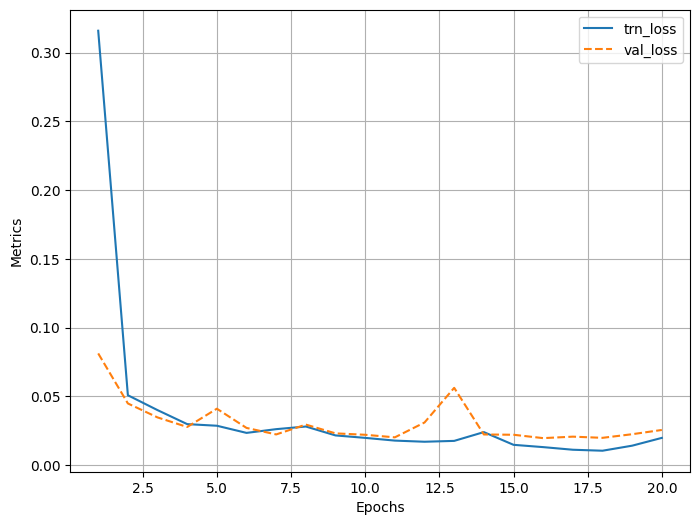

In [34]:
log.plot_epochs(['trn_loss','val_loss'])

100%|██████████| 121/121 [00:00<00:00, 144.02it/s]


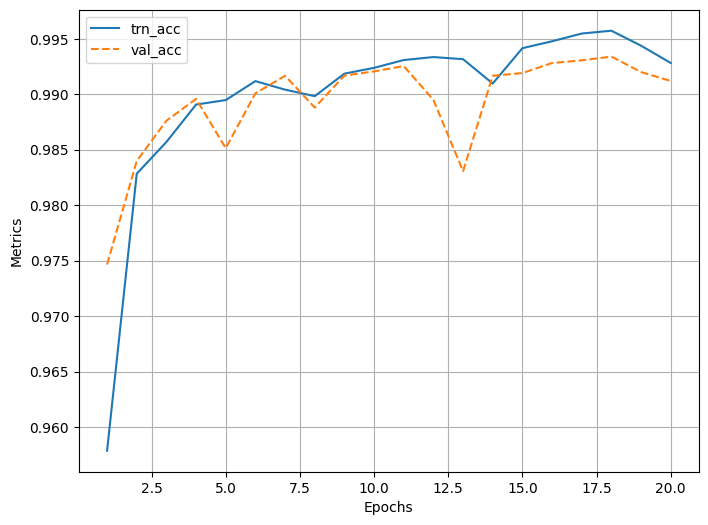

In [35]:
log.plot_epochs(['trn_acc','val_acc'])

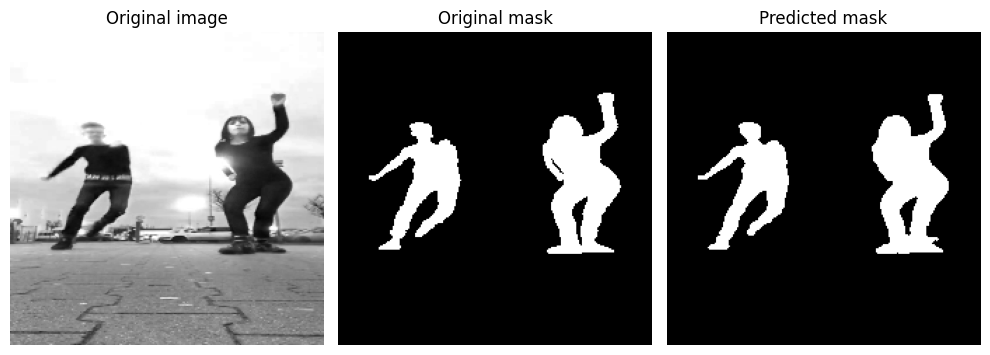

In [42]:
im, mask = next(iter(val_dl))
_mask = model(im)
_, _mask = torch.max(_mask, dim=1)

subplots([im[0].permute(1,2,0).detach().cpu()[:,:,0], mask.permute(1,2,0).detach().cpu()[:,:,0]
,_mask.permute(1,2,0).detach().cpu()[:,:,0]],
nc=3, titles=['Original image','Original mask','Predicted mask'],sz=10)

In [37]:
save_path = 'Amazonka_Unet'
torch.save(model.state_dict(), save_path)
!du -hsc {save_path} # size of the model on disk

112M	Amazonka_Unet
112M	total


In [38]:
# load_path = 'Brain@2_Unet_pytorch.pth'
# model.load_state_dict(torch.load(load_path)) #  # строка при загрузке на GРU
# # model.load_state_dict(torch.load(load_path, map_location=torch.device('cpu'))) # строка при загрузке на СРU